In [1]:
import pandas as pd

Exercise 1: Create a new dataframe pop with population data downloaded from Wikipedia. Make sure to clean the data so it can be used further.


In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
pop = pd.read_html(url, encoding='utf-8')[0]
pop
pop.columns = ['Country/Area', 'Continent', 'Sub-region', 'Population_2018',
                      'Population_2019', 'Change']
pop.head()
pop.dtypes


Country/Area       object
Continent          object
Sub-region         object
Population_2018     int64
Population_2019     int64
Change             object
dtype: object

In [4]:
from IPython.display import IFrame
url = 'https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes'

isocodes = pd.read_html(url, encoding='utf-8')[0]
isocodes

isocodes = isocodes.droplevel(0, axis=1)
isocodes.head()

mycols = isocodes.columns
mycols = [c[:c.find('[')] for c in mycols]
mycols

isocodes.columns = mycols
isocodes.head()

isocodes['Alpha-2 code original'] = isocodes['Alpha-2 code']
isocodes['Alpha-2 code'] = isocodes['Subdivision code links'].apply(lambda x: x[x.find(':')+1:])
isocodes.head()

isocodes = isocodes.drop(columns = (["Official state name", "Sovereignty", "Alpha-2 code", "Numeric code", "Subdivision code links", "Internet ccTLD", "Alpha-2 code original"]))
merged = isocodes.merge(pop, left_on='Country name', right_on='Country/Area')
merged



,Country name,Alpha-3 code,Country/Area,Continent,Sub-region,Population_2018,Population_2019,Change
0,Afghanistan,AFG,Afghanistan,Asia,Southern Asia,37171921,38041754,+2.34%
1,Albania,ALB,Albania,Europe,Southern Europe,2882740,2880917,−0.06%
2,Algeria,DZA,Algeria,Africa,Northern Africa,42228408,43053054,+1.95%
3,Andorra,AND,Andorra,Europe,Southern Europe,77006,77142,+0.18%
4,Angola,AGO,Angola,Africa,Middle Africa,30809787,31825295,+3.30%
...,...,...,...,...,...,...,...,...
139,Uzbekistan,UZB,Uzbekistan,Asia,Central Asia,32476244,32981716,+1.56%
140,Vanuatu,VUT,Vanuatu,Oceania,Melanesia,292680,299882,+2.46%
141,Yemen,YEM,Yemen,Asia,Western Asia,28498683,29161922,+2.33%
142,Zambia,ZMB,Zambia,Africa,Eastern Africa,17351708,17861030,+2.94%


In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
IFrame(url, width=800, height=400)

gdppc_wiki = pd.read_html(url, encoding='utf-8')[1]
gdppc_wiki

gdppc_wiki.columns = ['Country/Territory', 'UN Region', 'gdppc_IMF', 'year_IMF',
                      'gdppc_WB', 'year_WB', 'gdppc_CIA', 'year_CIA']
gdppc_wiki.head()

gdppc_wiki['country_name'] = gdppc_wiki['Country/Territory'].str.replace('*', '', regex=True).str.strip()

for c in gdppc_wiki.columns[2:-1]:
    if gdppc_wiki[c].dtype=='O':
        gdppc_wiki[c] = pd.to_numeric(gdppc_wiki[c].str.replace('—', 'nan'), errors='coerce')
        if c.startswith('year'):
            gdppc_wiki[c] = gdppc_wiki[c].astype('Int64')
gdppc_wiki.head()
merged = merged.merge(gdppc_wiki, left_on='Country name', right_on='country_name')
merged


,Country name,Alpha-3 code,Country/Area,Continent,Sub-region,Population_2018,Population_2019,Change,Country/Territory,UN Region,gdppc_IMF,year_IMF,gdppc_WB,year_WB,gdppc_CIA,year_CIA,country_name
0,Afghanistan,AFG,Afghanistan,Asia,Southern Asia,37171921,38041754,+2.34%,Afghanistan *,Asia,2456.0,2020,2079.0,2020,2000,2020,Afghanistan
1,Albania,ALB,Albania,Europe,Southern Europe,2882740,2880917,−0.06%,Albania *,Europe,17858.0,2022,15646.0,2021,13300,2020,Albania
2,Algeria,DZA,Algeria,Africa,Northern Africa,42228408,43053054,+1.95%,Algeria *,Africa,13324.0,2022,12038.0,2021,10700,2020,Algeria
3,Andorra,AND,Andorra,Europe,Southern Europe,77006,77142,+0.18%,Andorra *,Europe,65372.0,2022,NaN,<NA>,49900,2015,Andorra
4,Angola,AGO,Angola,Africa,Middle Africa,30809787,31825295,+3.30%,Angola *,Africa,7455.0,2022,6581.0,2021,6200,2020,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Uzbekistan,UZB,Uzbekistan,Asia,Central Asia,32476244,32981716,+1.56%,Uzbekistan *,Asia,9478.0,2022,8497.0,2021,7000,2020,Uzbekistan
140,Vanuatu,VUT,Vanuatu,Oceania,Melanesia,292680,299882,+2.46%,Vanuatu *,Oceania,2858.0,2022,3105.0,2021,2800,2020,Vanuatu
141,Yemen,YEM,Yemen,Asia,Western Asia,28498683,29161922,+2.33%,Yemen *,Asia,2136.0,2022,3689.0,2013,2500,2017,Yemen
142,Zambia,ZMB,Zambia,Africa,Eastern Africa,17351708,17861030,+2.94%,Zambia *,Africa,3808.0,2022,3624.0,2021,3300,2020,Zambia


In [6]:
import os

path = './data/'
pathout = './data/'
pathgraphs = './graphs/'

try: 
    os.mkdir(path) 
except OSError as error: 
    print("Folder already exists.")

try: 
    os.mkdir(pathgraphs) 
except OSError as error: 
    print("Folder already exists.")

In [7]:
merged.to_csv('./data/Wiki_Data', sep='\t')

<AxesSubplot:ylabel='Density'>

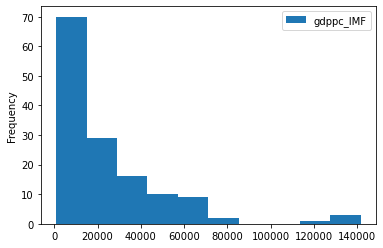

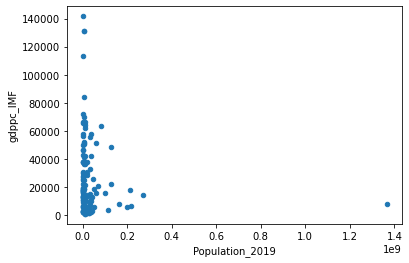

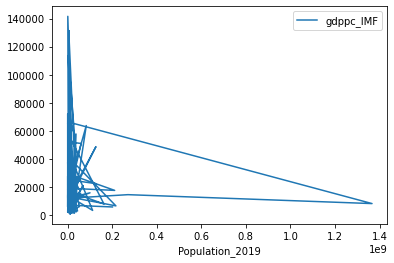

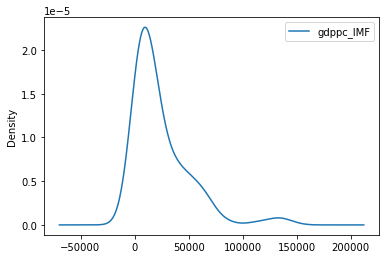

In [9]:
from matplotlib import pyplot as plt
merged.plot( x='Population_2019', y='gdppc_IMF', kind='hist')
plt.savefig("./graphs/output1.png")
merged.plot( x='Population_2019', y='gdppc_IMF', kind='scatter')
plt.savefig("./graphs/output2.png")
merged.plot( x='Population_2019', y='gdppc_IMF', kind='line')
plt.savefig("./graphs/output3.png")
merged.plot( x='Population_2019', y='gdppc_IMF', kind='kde')
